In [2]:
import numpy as np

class SimpleLSTM:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.Wf = np.array([[0.7], [0.5]])
        self.bf = np.array([0.1])
        
        self.Wi = np.array([[0.5], [0.5]])
        self.bi = np.array([0.1])
        
        self.Wc = np.array([[0.2], [0.3]])
        self.bc = np.array([0.4])
        
        self.Wo = np.array([[0.3], [0.9]])
        self.bo = np.array([0.2])
        
        self.Wy = np.array([2.3])
        self.by = np.array([0.5])
        
        self.h = np.zeros((hidden_dim, 1))
        self.c = np.zeros((hidden_dim, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward_step(self, x_t):
        x = np.array([[x_t], [self.h[0, 0]]])
        
        f_t = self.sigmoid(np.dot(self.Wf.T, x) + self.bf)
        i_t = self.sigmoid(np.dot(self.Wi.T, x) + self.bi)
        c_tilde = self.tanh(np.dot(self.Wc.T, x) + self.bc)
        
        self.c = f_t * self.c + i_t * c_tilde
        o_t = self.sigmoid(np.dot(self.Wo.T, x) + self.bo)
        
        self.h = o_t * self.tanh(self.c)
        
        return self.h

    def predict(self):
        return np.dot(self.Wy, self.h) + self.by

    def forward_sequence(self, sequence):
        hidden_states = []
        predictions = []

        for x_t in sequence:
            h_t = self.forward_step(x_t)
            hidden_states.append(h_t.copy())
            predictions.append(self.predict()[0])

        return hidden_states, predictions


In [3]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLSTM:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.Wf = np.array([[0.7], [0.5]])
        self.bf = np.array([0.1])
        
        self.Wi = np.array([[0.5], [0.5]])
        self.bi = np.array([0.1])
        
        self.Wc = np.array([[0.2], [0.3]])
        self.bc = np.array([0.4])
        
        self.Wo = np.array([[0.3], [0.9]])
        self.bo = np.array([0.2])
        
        self.Wy = np.array([2.3])
        self.by = np.array([0.5])
        
        self.h = np.zeros((hidden_dim, 1))
        self.c = np.zeros((hidden_dim, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward_step(self, x_t):
        x = np.array([[x_t], [self.h[0, 0]]])
        
        f_t = self.sigmoid(np.dot(self.Wf.T, x) + self.bf)
        i_t = self.sigmoid(np.dot(self.Wi.T, x) + self.bi)
        c_tilde = self.tanh(np.dot(self.Wc.T, x) + self.bc)
        
        self.c = f_t * self.c + i_t * c_tilde
        o_t = self.sigmoid(np.dot(self.Wo.T, x) + self.bo)
        
        self.h = o_t * self.tanh(self.c)
        
        return self.h

    def predict(self):
        y_pred = np.dot(self.Wy, self.h) + self.by
        return y_pred[0]

    def forward_sequence(self, sequence):
        hidden_states = []
        predictions = []

        for x_t in sequence:
            h_t = self.forward_step(x_t)
            hidden_states.append(h_t.copy())
            predictions.append(self.predict())

        return hidden_states, predictions

# Initialize LSTM with parameters matching the example
input_dim = 1
hidden_dim = 1
lstm = SimpleLSTM(input_dim, hidden_dim)

# Set initial states to match the example
lstm.h = np.array([[0.0]])
lstm.c = np.array([[0.0]])

# Input sequence from the example
sequence = [1, 2, 3]

# Process sequence step by step and print detailed calculations
print("Step-by-Step LSTM Calculations:")
for t, x_t in enumerate(sequence):
    print(f"\nTime Step {t+1}, Input x_{t+1} = {x_t}")

    x = np.array([[x_t], [lstm.h[0, 0]]])
    
    f_t = lstm.sigmoid(np.dot(lstm.Wf.T, x) + lstm.bf)
    print(f"1. Forget gate:")
    print(f"   f_t = sigmoid(W_f^T · [x_t, h_{{t-1}}] + b_f)")
    print(f"   f_t = sigmoid({lstm.Wf.T} · {[[x_t], [lstm.h[0, 0]]]} + {lstm.bf})")
    print(f"   f_t = {f_t[0,0]:.4f}")

    i_t = lstm.sigmoid(np.dot(lstm.Wi.T, x) + lstm.bi)
    print(f"2. Input gate:")
    print(f"   i_t = sigmoid(W_i^T · [x_t, h_{{t-1}}] + b_i)")
    print(f"   i_t = sigmoid({lstm.Wi.T} · {[[x_t], [lstm.h[0, 0]]]} + {lstm.bi})")
    print(f"   i_t = {i_t[0,0]:.4f}")

    c_tilde = lstm.tanh(np.dot(lstm.Wc.T, x) + lstm.bc)
    print(f"3. Candidate cell state:")
    print(f"   c~_t = tanh(W_c^T · [x_t, h_{{t-1}}] + b_c)")
    print(f"   c~_t = tanh({lstm.Wc.T} · {[[x_t], [lstm.h[0, 0]]]} + {lstm.bc})")
    print(f"   c~_t = {c_tilde[0,0]:.4f}")

    c_prev = lstm.c.copy()
    lstm.c = f_t * lstm.c + i_t * c_tilde
    print(f"4. Cell state update:")
    print(f"   c_t = f_t * c_{{t-1}} + i_t * c~_t")
    print(f"   c_t = {f_t[0,0]:.4f} * {c_prev[0,0]:.4f} + {i_t[0,0]:.4f} * {c_tilde[0,0]:.4f}")
    print(f"   c_t = {lstm.c[0,0]:.4f}")

    o_t = lstm.sigmoid(np.dot(lstm.Wo.T, x) + lstm.bo)
    print(f"5. Output gate:")
    print(f"   o_t = sigmoid(W_o^T · [x_t, h_{{t-1}}] + b_o)")
    print(f"   o_t = sigmoid({lstm.Wo.T} · {[[x_t], [lstm.h[0, 0]]]} + {lstm.bo})")
    print(f"   o_t = {o_t[0,0]:.4f}")

    h_prev = lstm.h.copy()
    lstm.h = o_t * lstm.tanh(lstm.c)
    print(f"6. Hidden state update:")
    print(f"   h_t = o_t * tanh(c_t)")
    print(f"   h_t = {o_t[0,0]:.4f} * tanh({lstm.c[0,0]:.4f})")
    print(f"   h_t = {lstm.h[0,0]:.4f}")


Step-by-Step LSTM Calculations:

Time Step 1, Input x_1 = 1
1. Forget gate:
   f_t = sigmoid(W_f^T · [x_t, h_{t-1}] + b_f)
   f_t = sigmoid([[0.7 0.5]] · [[1], [0.0]] + [0.1])
   f_t = 0.6900
2. Input gate:
   i_t = sigmoid(W_i^T · [x_t, h_{t-1}] + b_i)
   i_t = sigmoid([[0.5 0.5]] · [[1], [0.0]] + [0.1])
   i_t = 0.6457
3. Candidate cell state:
   c~_t = tanh(W_c^T · [x_t, h_{t-1}] + b_c)
   c~_t = tanh([[0.2 0.3]] · [[1], [0.0]] + [0.4])
   c~_t = 0.5370
4. Cell state update:
   c_t = f_t * c_{t-1} + i_t * c~_t
   c_t = 0.6900 * 0.0000 + 0.6457 * 0.5370
   c_t = 0.3467
5. Output gate:
   o_t = sigmoid(W_o^T · [x_t, h_{t-1}] + b_o)
   o_t = sigmoid([[0.3 0.9]] · [[1], [0.0]] + [0.2])
   o_t = 0.6225
6. Hidden state update:
   h_t = o_t * tanh(c_t)
   h_t = 0.6225 * tanh(0.3467)
   h_t = 0.2076

Time Step 2, Input x_2 = 2
1. Forget gate:
   f_t = sigmoid(W_f^T · [x_t, h_{t-1}] + b_f)
   f_t = sigmoid([[0.7 0.5]] · [[2], [0.20758373501228553]] + [0.1])
   f_t = 0.8325
2. Input gate:
   

In [4]:
# Predict next value
next_value = lstm.predict()
print("\nFinal Prediction:")
print(f"ŷ_5 = W_y · h_4 + b_y")
print(f"ŷ_5 = {lstm.Wy[0]} · {lstm.h[0,0]:.4f} + {lstm.by[0]}")
print(f"ŷ_5 = {next_value:.4f}")




Final Prediction:
ŷ_5 = W_y · h_4 + b_y
ŷ_5 = 2.3 · 0.7406 + 0.5
ŷ_5 = 2.2034


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3344\2690261766.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('magma'), aspect='auto', alpha=0.6)


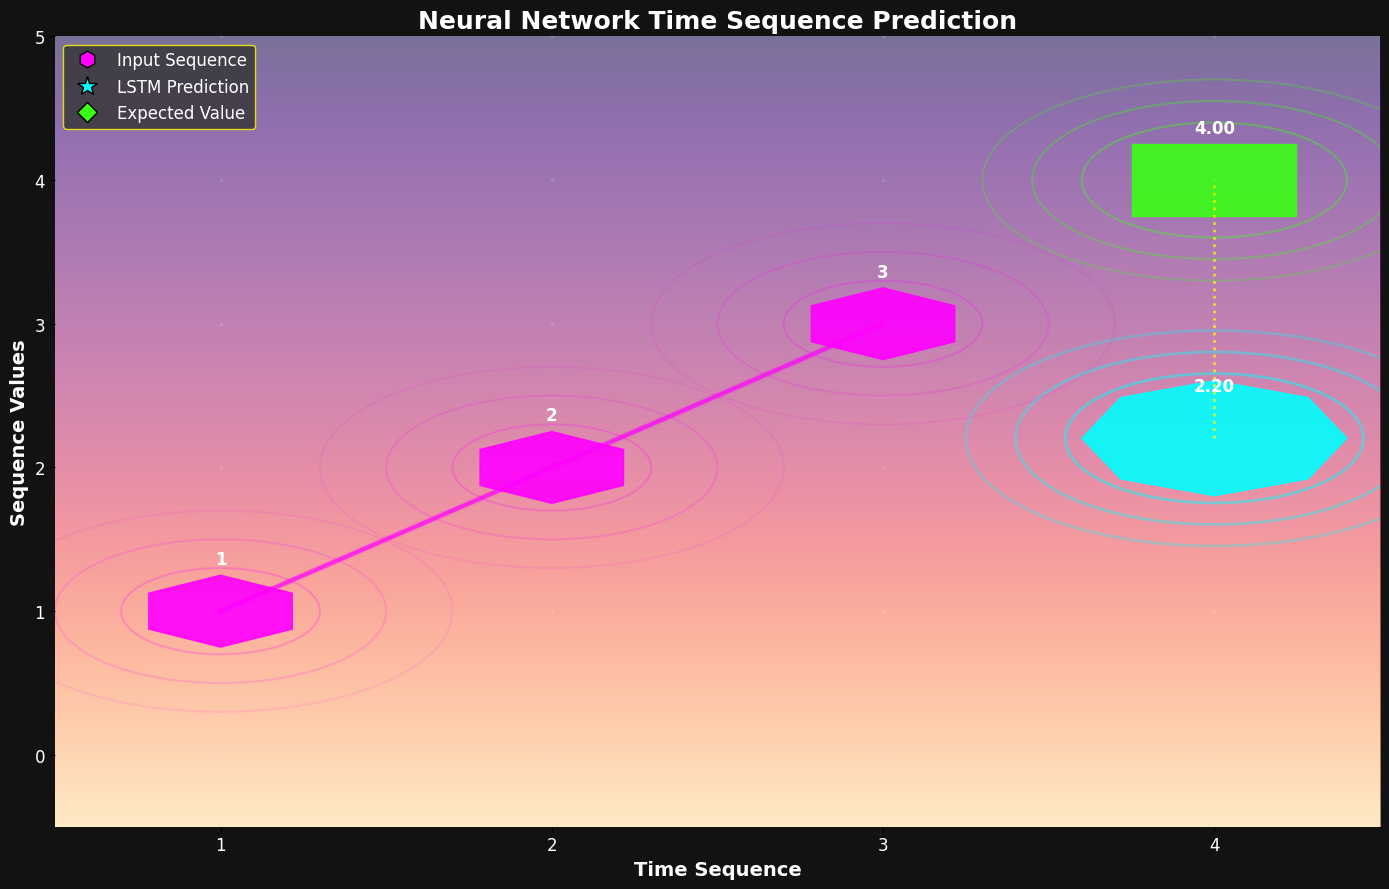

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Circle, RegularPolygon
import numpy as np
from matplotlib import colors as mcolors
from matplotlib.patheffects import withStroke

# Create a custom dark theme figure
plt.figure(figsize=(14, 9), facecolor='#121212')

# Define a neon color palette
neon_blue = '#00ffff'
neon_pink = '#ff00ff'
neon_green = '#39ff14'
neon_yellow = '#ffff00'
neon_orange = '#ff9900'

# Create a gradient background
ax = plt.gca()
gradient = np.linspace(0, 1, 500).reshape(-1, 1)
gradient = np.repeat(gradient, 500, 1)
ax.imshow(gradient, extent=[0, len(sequence) + 2, -1, 6], 
          cmap=plt.cm.get_cmap('magma'), aspect='auto', alpha=0.6)

# Custom grid with constellation-like dots
for i in range(1, len(sequence) + 2):
    for j in range(0, 6):
        plt.scatter(i, j, color='white', alpha=0.1, s=3)

# Connect sequence points with glowing line
plt.plot(range(1, len(sequence) + 1), sequence, alpha=0.7, 
         color=neon_pink, linewidth=3, 
         path_effects=[withStroke(linewidth=5, foreground='#ff00ff20')])

# Create custom shapes for data points
for i, val in enumerate(sequence):
    # Create a hexagon for each sequence point
    hex_point = RegularPolygon((i+1, val), numVertices=6, radius=0.25, 
                              orientation=0, color=neon_pink, alpha=0.9)
    ax.add_patch(hex_point)
    
    # Add pulsing circles around each point
    for size in [0.3, 0.5, 0.7]:
        circle = Circle((i+1, val), radius=size, fill=False, 
                        color=neon_pink, alpha=0.3 - size*0.3, linewidth=1.5)
        ax.add_patch(circle)

# Create a star-like shape for prediction
prediction_star = RegularPolygon((len(sequence) + 1, next_value), 
                                numVertices=8, radius=0.4, 
                                orientation=0, color=neon_blue, alpha=0.9)
ax.add_patch(prediction_star)

# Add glowing effect to prediction
for size in [0.45, 0.6, 0.75]:
    pred_glow = Circle((len(sequence) + 1, next_value), radius=size, 
                      fill=False, color=neon_blue, alpha=0.8 - size*0.7, linewidth=2)
    ax.add_patch(pred_glow)

# Create a diamond for expected value
expected_diamond = RegularPolygon((len(sequence) + 1, 4), numVertices=4, 
                                 radius=0.35, orientation=np.pi/4, 
                                 color=neon_green, alpha=0.9)
ax.add_patch(expected_diamond)

# Add glowing effect to expected value
for size in [0.4, 0.55, 0.7]:
    exp_glow = Circle((len(sequence) + 1, 4), radius=size, 
                     fill=False, color=neon_green, alpha=0.6 - size*0.5, linewidth=1.5)
    ax.add_patch(exp_glow)

# Connect prediction and expected with vertical dotted line
plt.plot([len(sequence) + 1, len(sequence) + 1], [next_value, 4], 
         color=neon_yellow, linestyle=':', linewidth=2, alpha=0.7)

# Add value labels
for i, val in enumerate(sequence):
    plt.text(i+1, val+0.3, f"{val}", color='white', fontsize=12, 
             ha='center', va='bottom', fontweight='bold')
plt.text(len(sequence) + 1, next_value+0.3, f"{next_value:.2f}", 
         color='white', fontsize=12, ha='center', va='bottom', fontweight='bold')
plt.text(len(sequence) + 1, 4+0.3, "4.00", color='white', 
         fontsize=12, ha='center', va='bottom', fontweight='bold')

# Create unique x-axis with triangular markers
plt.xticks(range(1, len(sequence) + 2))
ax.set_xticklabels(range(1, len(sequence) + 2))
for tick in ax.get_xticklabels():
    tick.set_color('white')
    tick.set_fontsize(12)

# Create custom y-axis
plt.yticks(range(0, 6))
for tick in ax.get_yticklabels():
    tick.set_color('white')
    tick.set_fontsize(12)

# Add futuristic labels
plt.xlabel('Time Sequence', color='white', fontsize=14, fontweight='bold')
plt.ylabel('Sequence Values', color='white', fontsize=14, fontweight='bold')
plt.title('Neural Network Time Sequence Prediction', color='white', 
          fontsize=18, fontweight='bold')

# Custom legend with unique shapes
legend_elements = [
    plt.Line2D([0], [0], marker='h', color='none', markerfacecolor=neon_pink, 
               markersize=12, label='Input Sequence'),
    plt.Line2D([0], [0], marker='*', color='none', markerfacecolor=neon_blue, 
               markersize=15, label='LSTM Prediction'),
    plt.Line2D([0], [0], marker='D', color='none', markerfacecolor=neon_green, 
               markersize=10, label='Expected Value')
]
plt.legend(handles=legend_elements, loc='upper left', frameon=True, 
           facecolor='#333333', edgecolor=neon_yellow, framealpha=0.8, 
           fontsize=12, labelcolor='white')

# Set axis limits with some padding
plt.xlim(0.5, len(sequence) + 1.5)
plt.ylim(-0.5, 5)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()